In [1]:
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rc('pdf', fonttype=42)

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns

# Timeline

In [4]:
_ = (
    pd.read_csv(
        'rehydrated_tweets_count_by_day.csv',
        parse_dates=['day'],
        index_col=['day', 'lang']
   )
    ['count']
    .unstack('lang', fill_value=0)
)

_['total'] = _.sum(axis=1)
_ = _[['lv', 'ru', 'en', 'total']]

timeline = _

In [5]:
timeline.head()

lang,lv,ru,en,total
day,,,,
2017-04-15,1313,367,138,1967
2017-04-16,1467,340,191,2211
2017-04-17,1370,290,182,2015
2017-04-18,2789,383,313,3668
2017-04-19,3173,453,310,4165


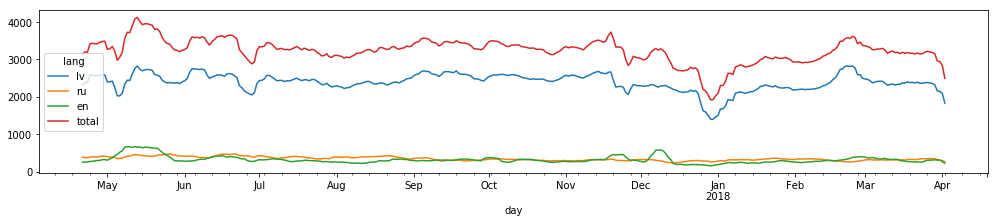

In [6]:
_ = timeline.rolling(window=7).mean().plot(figsize=(17, 3))

_.figure.savefig('rehydrated_tweets_count_by_day.pdf')

# Language usage 

In [7]:
_ = pd.read_csv('rehydrated_tweets_lang_usage.csv', index_col='rnum')

_['Language Uniformity Score'] = (_[['lv', 'ru', 'en']].max(axis=1) / _[['lv', 'ru', 'en']].sum(axis=1)).round(2)

lang_usage = _

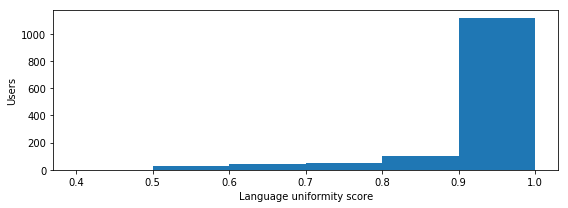

In [8]:
_ = lang_usage['Language Uniformity Score'].plot.hist(bins=6, figsize=(8, 3))

_.set(xlabel="Language uniformity score", ylabel="Users")
_.figure.tight_layout()

_.figure.savefig('rehydrated_tweets_lang_usage.pdf')

In [9]:
lang_usage.sort_values('Language Uniformity Score').head()

,lv,ru,en,total,Language Uniformity Score
rnum,,,,,
845,48,55,34,174,0.40
423,71,118,81,391,0.44
320,220,226,6,511,0.50
1132,62,0,61,125,0.50
219,350,0,344,787,0.50


# Language preference

## Monolingual

In [10]:
(
    lang_usage[
        (lang_usage[['lv', 'ru', 'en']] == 0).sum(axis='columns') == 2
    ]
    [['lv', 'ru', 'en']] > 0
).sum(axis='rows')

lv    235
ru     18
en     42
dtype: int64

## Multilingual

In [11]:
(
    lang_usage[
        (lang_usage[['lv', 'ru', 'en']] > 0).sum(axis='columns') > 1
    ]
    [['lv', 'ru', 'en']]
    .replace(0, np.nan)
    .rank(axis='columns', method='min', ascending=False)
    .apply(lambda c: c.value_counts(), axis='rows')
)

,lv,ru,en
1.0,820,123,106
2.0,127,93,855
3.0,46,153,55


# Topics

In [12]:
relevance_judgments_count_by_day = (
    pd.read_csv(
        'relevance_judgments_count_by_day.csv',
        index_col=['day', 'topic_id'],
        parse_dates=['day'],
    )['count']
    .unstack('topic_id', fill_value=0)
)

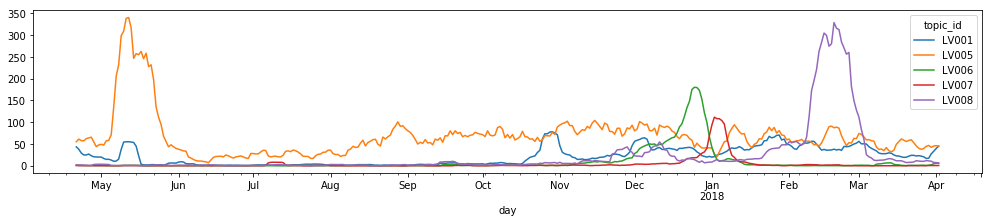

In [13]:
(
    relevance_judgments_count_by_day[['LV001', 'LV005', 'LV006', 'LV007', 'LV008']]
    .rolling(window=7).mean()
    .plot(figsize=(17, 3))
);

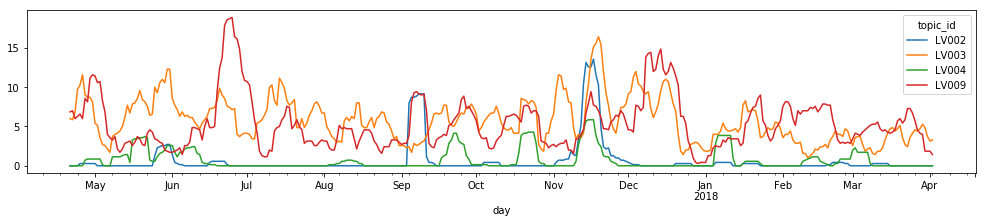

In [14]:
(
    relevance_judgments_count_by_day[['LV002', 'LV003', 'LV004', 'LV009']]
    .rolling(window=7).mean()
    .plot(figsize=(17, 3))
);

In [28]:
_ = (
    pd.read_csv(
        'relevance_judgments_lang_pref_by_day.csv',
        index_col=['day', 'topic_id'],
        parse_dates=['day'],
    )
)

_.columns = pd.MultiIndex.from_tuples(
    [
        ('Counts', 'Total'),
        ('Counts', 'lv, ru, en'),

        ('Tweets', 'lv'),
        ('Tweets', 'ru'),
        ('Tweets', 'en'),

        ('Users', 'lv'),
        ('Users', 'ru'),
        ('Users', 'en'),
    ],
    names=['Type', 'Language']
)
relevance_judgments_lang_pref_by_day = _

In [29]:
relevance_judgments_lang_pref_by_day.head()

Type                Counts            Tweets             Users            
Language             Total lv, ru, en     lv    ru    en    lv    ru    en
day        topic_id                                                       
2017-04-15 LV001        47         47   0.91  0.02  0.06  0.84  0.03  0.13
2017-04-16 LV001        48         48   0.98  0.02  0.00  0.94  0.04  0.03
2017-04-17 LV001        36         34   0.79  0.21  0.00  0.77  0.20  0.04
2017-04-18 LV001        19         19   0.89  0.11  0.00  0.88  0.10  0.01
2017-04-19 LV001        15         15   0.80  0.07  0.13  0.85  0.13  0.02

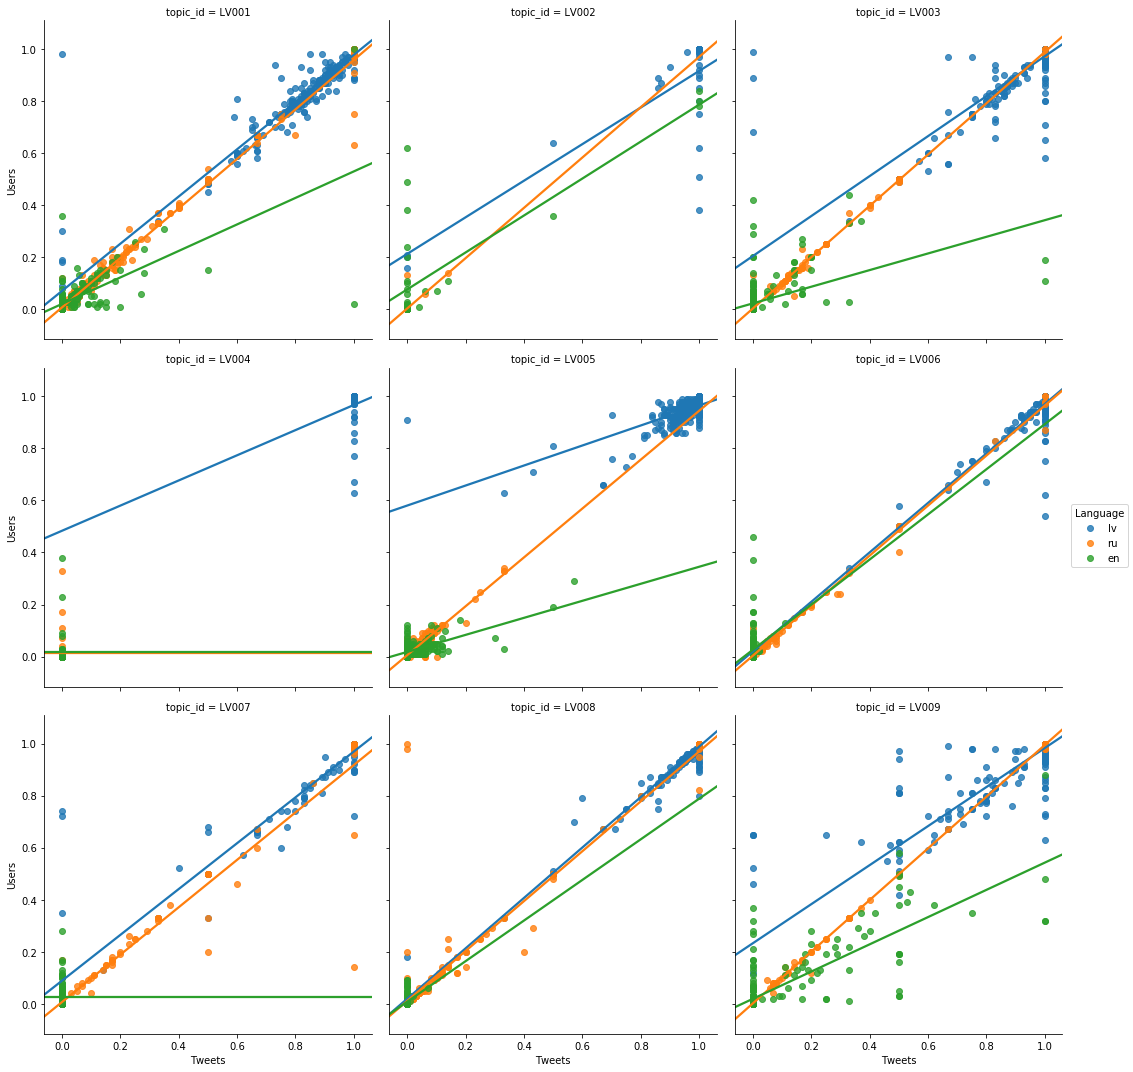

In [49]:
_ = relevance_judgments_lang_pref_by_day[['Tweets', 'Users']].stack().reset_index(['topic_id', 'Language'])

sns.lmplot(
    x='Tweets', y='Users',
    hue='Language', hue_order=['lv', 'ru', 'en'],
    col='topic_id', col_wrap=3,
    data=_,
    ci=None,
);

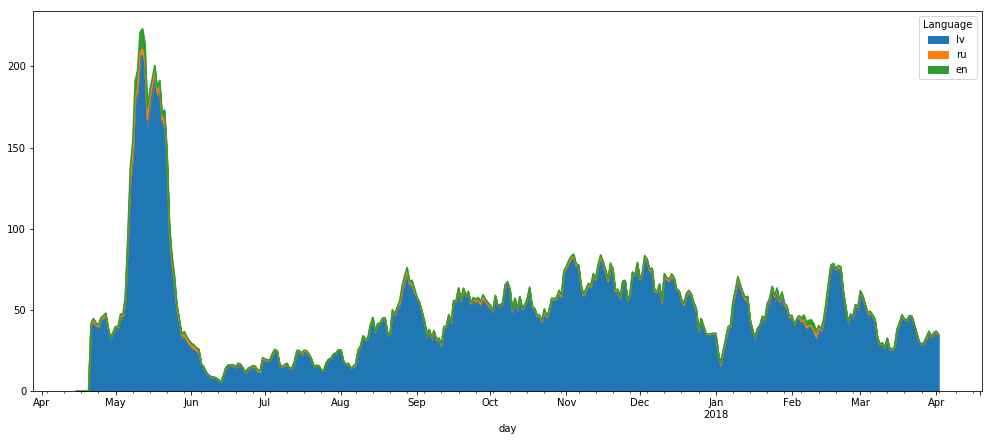

In [151]:
_ = relevance_judgments_lang_pref_by_day.loc[(slice(None), 'LV005'), :].reset_index('topic_id')

(
    _['Tweets']
    .multiply(
        _['Counts', 'lv, ru, en'],
        axis='rows',
    )
    .rolling(window=7).mean()
    .plot.area(figsize=(17, 7))
);

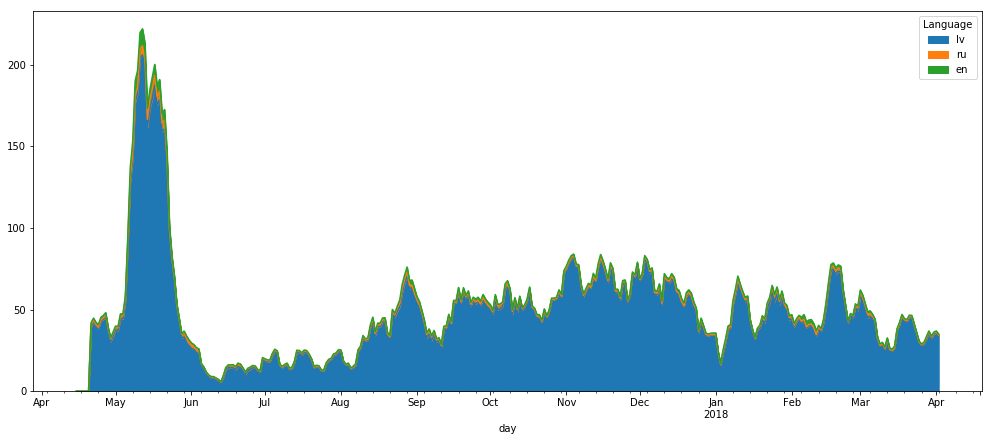

In [152]:
_ = relevance_judgments_lang_pref_by_day.loc[(slice(None), 'LV005'), :].reset_index('topic_id')

(
    _['Users']
    .multiply(
        _['Counts', 'lv, ru, en'],
        axis='rows',
    )
    .rolling(window=7).mean()
    .plot.area(figsize=(17, 7))
);